In [14]:
import torch
import torch.nn as nn

In [15]:
conv = nn.Conv2d(3, 16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [16]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [17]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [19]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [20]:
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'transforms']

In [21]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
transform=transforms.ToTensor())

In [22]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
        (0.2470, 0.2435, 0.2616))
    ]))

In [23]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
        (0.2470, 0.2435, 0.2616))
    ]))

In [24]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
for img, label in transformed_cifar10
if label in [0, 2]]
cifar2_val = [(img, label_map[label])
for img, label in cifar10_val
if label in [0, 2]]

In [25]:
cifar2_val = [(img, label_map[label])
for img, label in transformed_cifar10_val
if label in [0, 2]]

In [26]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

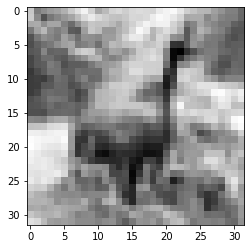

In [27]:
plt.imshow(img.unsqueeze(0)[0, 0].detach(), cmap='gray')
plt.show()

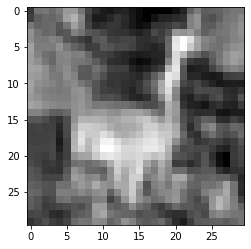

In [28]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [29]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

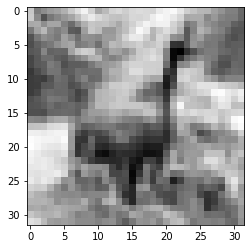

In [30]:
plt.imshow(img.unsqueeze(0)[0, 0].detach(), cmap='gray')
plt.show()

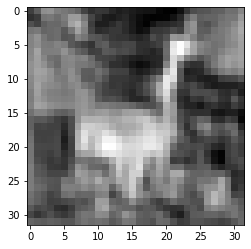

In [31]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [32]:
with torch.no_grad():
    conv.bias.zero_()

In [33]:
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

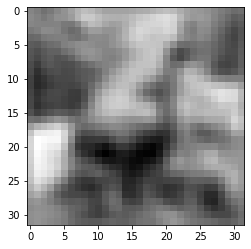

In [34]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [35]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

In [36]:
with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

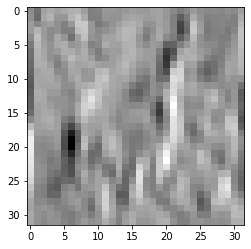

In [37]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [38]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

In [39]:
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

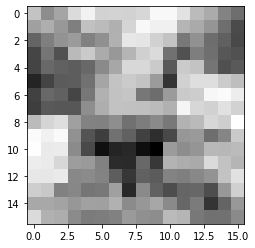

In [40]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

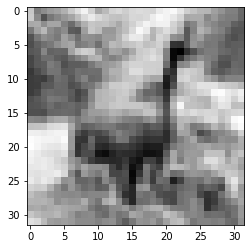

In [41]:
plt.imshow(img.unsqueeze(0)[0, 0].detach(), cmap='gray')
plt.show()

In [43]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Tanh(),
    nn.Linear(128, 2))
loss_fn = nn.CrossEntropyLoss()

In [45]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)
    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [46]:
model = Net()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [48]:
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [49]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.1053,  0.0945]], grad_fn=<AddmmBackward>)

In [50]:
import datetime

In [51]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
            
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

In [52]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
    shuffle=True)

In [54]:
import torch.optim as optim
model = Net()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

In [55]:
training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2020-07-21 01:53:00.097845 Epoch 1, Training loss 0.5556404328649971
2020-07-21 01:53:16.744003 Epoch 10, Training loss 0.33303328266569004
2020-07-21 01:53:34.677303 Epoch 20, Training loss 0.29002083211567753
2020-07-21 01:53:52.344627 Epoch 30, Training loss 0.26683249224902716
2020-07-21 01:54:10.304105 Epoch 40, Training loss 0.246725917384503
2020-07-21 01:54:39.510007 Epoch 50, Training loss 0.23292214252576707
2020-07-21 01:55:04.962699 Epoch 60, Training loss 0.21864769398976283
2020-07-21 01:55:32.043209 Epoch 70, Training loss 0.20356859043715106
2020-07-21 01:55:55.569060 Epoch 80, Training loss 0.19037465594566552
2020-07-21 01:56:20.684344 Epoch 90, Training loss 0.17775698447493232
2020-07-21 01:56:43.456587 Epoch 100, Training loss 0.16381240047656806


In [56]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
shuffle=False)

In [57]:
def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
            
        print("Accuracy {}: {:.2f}".format(name , correct / total))

In [58]:
validate(model, train_loader, val_loader)

Accuracy train: 0.93
Accuracy val: 0.88


In [59]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [60]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path
+ 'birds_vs_airplanes.pt'))

<All keys matched successfully>